# Fig 2 - DS/yield/econ over time

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
import pandas as pd
from scipy.stats import norm
from scipy import signal

import seaborn as sns
from math import floor

import numpy as np
import matplotlib.pyplot as plt

import copy



from poly2.utils import get_dist_mean, edge_values

from poly2.run import simulations_run, no_joblib_simulations_run
from poly2.config import Config

In [3]:
cs = Config(
    type='single',
    sprays=[2],
    host_on=[False],
    n_k=100,
    verbose=False,
)

In [13]:
doses1 = 0.5 * np.ones(15)

In [14]:
doses2 = 1 * np.ones(15)

In [15]:
r1 = no_joblib_simulations_run(
    cs,
    doses_run=doses1,
)

running simulation


In [16]:
r2 = no_joblib_simulations_run(
    cs,
    doses_run=doses2,
)

running simulation


# Plot

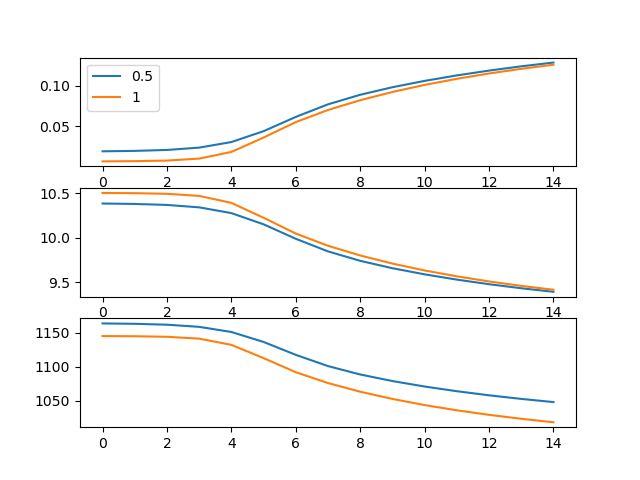

In [20]:
f, ax = plt.subplots(3, 1)

ax[0].plot(r1['spray_Y2_host_N']['dis_sev'], label='0.5')
ax[0].plot(r2['spray_Y2_host_N']['dis_sev'], label='1')

ax[1].plot(r1['spray_Y2_host_N']['yield_vec'], label='0.5')
ax[1].plot(r2['spray_Y2_host_N']['yield_vec'], label='1')

ax[2].plot(r1['spray_Y2_host_N']['econ'], label='0.5')
ax[2].plot(r2['spray_Y2_host_N']['econ'], label='1')

ax[0].legend()

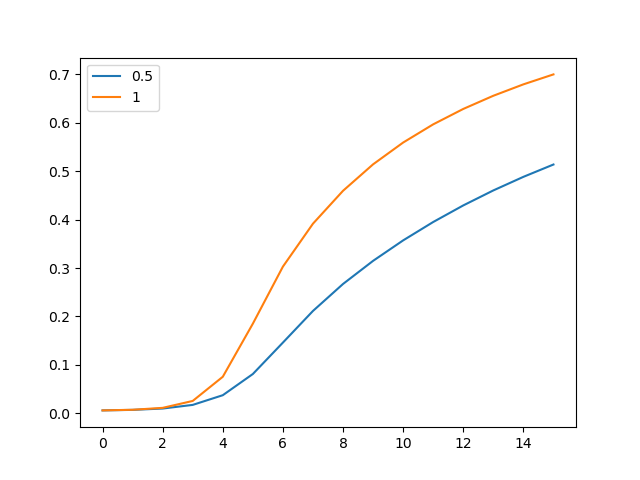

In [11]:
f, ax = plt.subplots()

d1 = get_dist_mean(r1['spray_Y2_host_N']['fung_dists'], r1['spray_Y2_host_N']['k_vec'])
d2 = get_dist_mean(r2['spray_Y2_host_N']['fung_dists'], r2['spray_Y2_host_N']['k_vec'])

ax.plot(d1, label='0.5')
ax.plot(d2, label='1')

ax.legend()

# Simple dose test

In [12]:
cs.sprays = [3]

In [13]:
runs = []

for xx in np.linspace(0, 1, 11):
    doses = xx * np.ones(15)
    rr = no_joblib_simulations_run(
        cs,
        doses_run=doses,
    )
    
    runs.append(rr)

running simulation
running simulation
running simulation
running simulation
running simulation
running simulation
running simulation
running simulation
running simulation
running simulation
running simulation


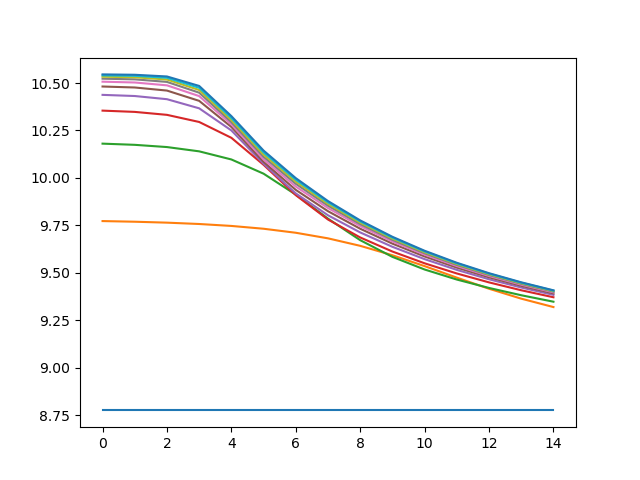

In [14]:
f, ax = plt.subplots()

for rr in runs:
    ax.plot(rr['spray_Y3_host_N']['yield_vec'])

Maybe would be worth checking how things operate if mutation prop was higher?

## Higher mutation prop

In [21]:
cs_m2 = copy.deepcopy(cs)

In [22]:
cs_m2.mutation_proportion = 5e-2

In [23]:
runs = []

for xx in np.linspace(0, 1, 11):
    doses = xx * np.ones(15)
    
    rr = no_joblib_simulations_run(
        cs_m2,
        doses_run=doses,
        verbose=False
    )
    
    runs.append(rr)

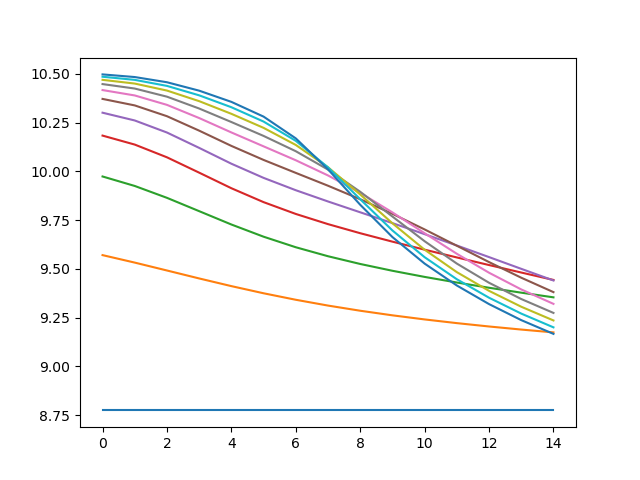

In [25]:
f, ax = plt.subplots()

for rr in runs:
    ax.plot(rr['spray_Y2_host_N']['yield_vec'])